In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

# Generate some data


In [2]:
n_samples = 10000
data = pd.DataFrame(
    {"col_0":np.random.uniform(size = n_samples),
     "col_1":np.random.uniform(size = n_samples),
    }
)

In [3]:
expressions_target = {}
# non linear component
expressions_target['non_linear'] = {
    'weight':0.1,
    'expr':'(col_0-0.5)**2 +(col_1-0.5)'
}
expressions_target['uniform_noise'] = {'weight':0.9}
# expressions_target['gaussian_noise'] = {'weight':10000.9}


expressions_selection = {}
# linear component
expressions_selection['linear'] = {
    'weight':1,
    'expr':'0.9*(col_0) -0.2*(col_1)-0.2'
}
expressions_selection['uniform_noise'] = {'weight':0}

In [4]:
df_score_target = target.get_target_and_contributions(data, 
                                               expressions= expressions_target, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.2,
                                               drop_features = False
                                              )

df_score_selection = target.get_target_and_contributions(data, 
                                               expressions= expressions_selection, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.7,
                                               drop_features = False
                                              )



In [5]:
from sklearn.metrics import roc_auc_score

In [6]:
roc_auc_score(df_score_target['y'],df_score_target['score_pred'])

0.9324882812499999

In [7]:
{
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }

{'score_non_linear': 'score_non_linear_target',
 'score_uniform_noise': 'score_uniform_noise_target',
 'score_pred': 'score_pred_target',
 'score_total': 'score_total_target'}

In [8]:
df_score_target = df_score_target.rename(columns={
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }
                      )
df_score_selection = df_score_selection.rename(columns={
    col:f"{col}_sel" for col in df_score_selection.columns if col.startswith("score")
                               }
                      )

df_score_selection = df_score_selection.rename(columns = {"y":"is_selected"})


In [9]:
exp_data = pd.concat([df_score_target, df_score_selection.drop(["col_0","col_1"],axis=1)], axis = 1)

In [10]:
exp_data.head()

,col_0,col_1,score_non_linear_target,score_uniform_noise_target,score_pred_target,score_total_target,y,score_linear_sel,score_uniform_noise_sel,score_pred_sel,score_total_sel,is_selected
0,0.626863,0.990956,0.872905,0.031941,0.872905,1.777751,0,0.518959,1.000000e-08,0.518959,1.037919,1
1,0.879293,0.505602,0.549977,0.388568,0.549977,1.488521,0,0.851925,1.000000e-08,0.851925,1.703850,1
2,0.820867,0.727206,0.713156,0.598011,0.713156,2.024323,0,0.752416,1.000000e-08,0.752416,1.504833,1
3,0.171061,0.301965,0.333915,0.959281,0.333915,1.627111,0,0.239249,1.000000e-08,0.239249,0.478499,0
4,0.373985,0.703289,0.612951,0.941637,0.612951,2.167540,1,0.344350,1.000000e-08,0.344350,0.688700,1


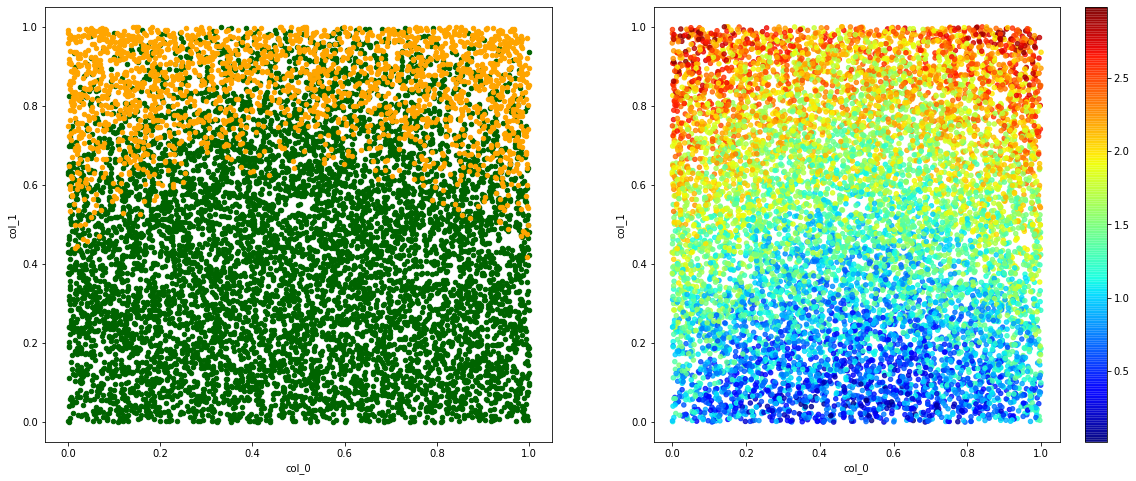

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
exp_data[exp_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "darkgreen");
exp_data[exp_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



In [12]:
sel_data = exp_data[exp_data['is_selected']==1]

In [13]:
exp_data['y'].value_counts(normalize = True)

0    0.8
1    0.2
Name: y, dtype: float64

In [14]:
exp_data['is_selected'].value_counts(normalize = True)

1    0.7
0    0.3
Name: is_selected, dtype: float64

In [15]:
sel_data['y'].value_counts(normalize = True)

0    0.835714
1    0.164286
Name: y, dtype: float64

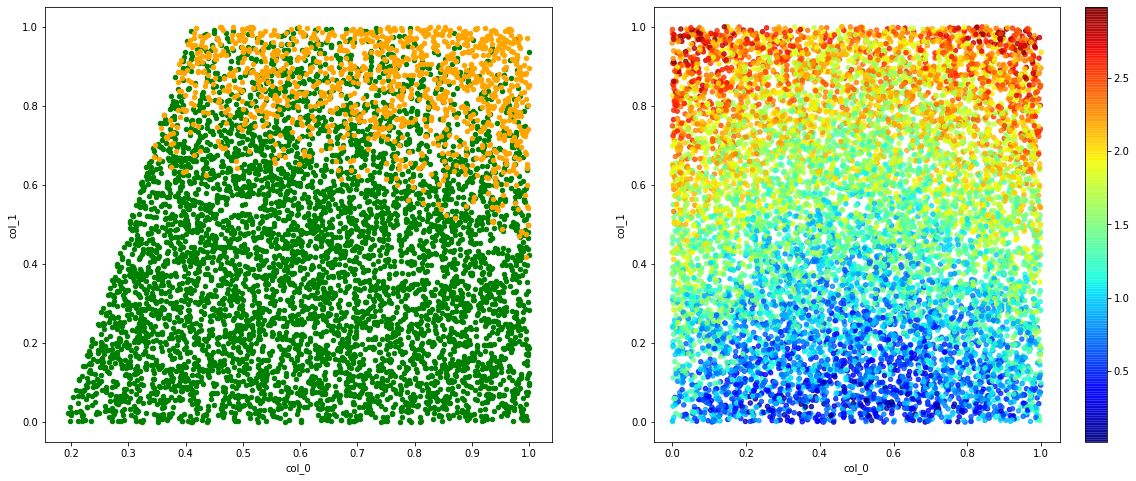

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sel_data[sel_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "green");
sel_data[sel_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



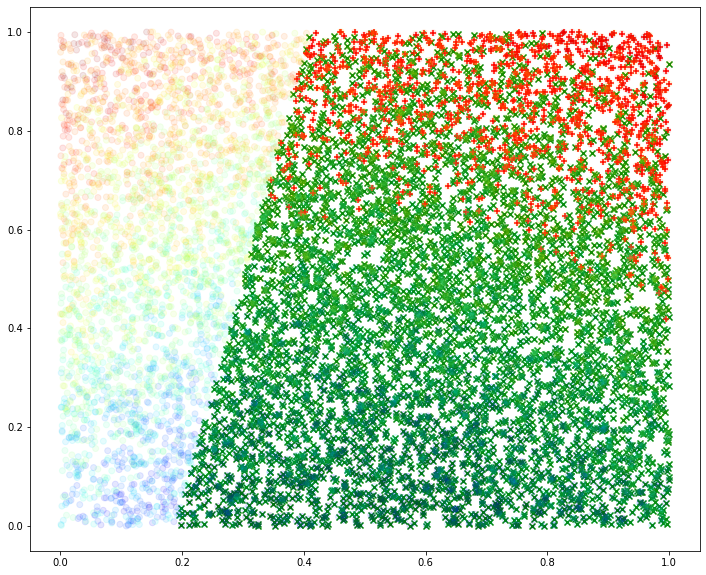

In [17]:
fig, ax = plt.subplots(figsize=(12,10))

x_0 = sel_data[sel_data["y"]==0]['col_0'].values
y_0 = sel_data[sel_data["y"]==0]['col_1'].values
x_1 = sel_data[sel_data["y"]==1]['col_0'].values
y_1 = sel_data[sel_data["y"]==1]['col_1'].values


ax.scatter(x_0,y_0,marker='x', color = 'green', alpha = 1)
ax.scatter(x_1,y_1,marker='+', color = 'red', alpha = 1)

ax.scatter(
    exp_data["col_0"], exp_data["col_1"], c=exp_data["score_total_target"], cmap='jet', alpha = 0.1
)


